<a href="https://colab.research.google.com/github/lich070192/colab/blob/main/STAT0009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STAT0009

20117921, numero, numero

Paper: https://www.ssc.wisc.edu/~bhansen/718/Hamilton1989.pdf

Intro in Python: https://ericmjl.github.io/essays-on-data-science/machine-learning/markov-models/

Colab simile: https://colab.research.google.com/github/ChadFulton/tsa-notebooks/blob/master/markov_autoregression.ipynb#scrollTo=n1LFAf9CdEFa

# Literature and Data Review

$\alpha$




# Fitting the Model

# Discussion

In [41]:
import numpy as np
import pandas as pd
import seaborn as sn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
gdp_df = pd.read_excel("/content/drive/My Drive/UCL/STAT0009_ICA2/us_gdp_data.xlsx", index_col=0,
                   dtype={'Date': str, 'Last Price': float})
gdp_df.index = pd.to_datetime(gdp_df.index)

# NBER recessions
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1947, 1, 1), end=datetime(2022, 2, 1))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
gdp_df['Last Price']

Date
1947-06-30   -0.276142
1947-09-30   -0.200603
1947-12-31    1.562973
1948-03-31    1.515213
1948-06-30    1.658293
                ...   
2018-12-31    0.224245
2019-03-31    0.594674
2019-06-30    0.790575
2019-09-30    0.692768
2019-12-31    0.471653
Name: Last Price, Length: 291, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


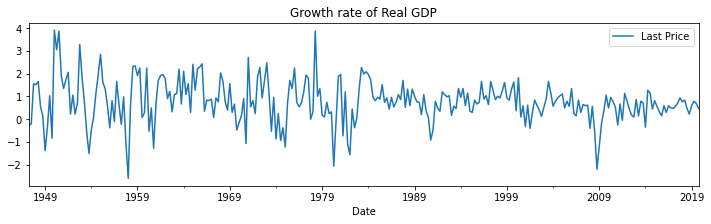

In [43]:
# removing the pandemic
gdp_df = gdp_df[gdp_df.index < '2020-01-01']

# de annualize
gdp_df['Last Price'] = ((1 + gdp_df['Last Price']/100) ** (1/4) - 1) * 100

# Plot the data
gdp_df.plot(title='Growth rate of Real GDP', figsize=(12,3))

# Fit the model
gdp_model = sm.tsa.MarkovAutoregression(gdp_df['Last Price'], k_regimes=2, order=4, switching_ar=False)
gdp_residuals = gdp_model.fit()

In [44]:
print(gdp_residuals.summary())

                         Markov Switching Model Results                         
Dep. Variable:               Last Price   No. Observations:                  287
Model:             MarkovAutoregression   Log Likelihood                -355.344
Date:                  Wed, 23 Feb 2022   AIC                            728.688
Time:                          22:11:45   BIC                            761.623
Sample:                      06-30-1947   HQIC                           741.888
                           - 12-31-2019                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4147      0.286     -4.940      0.000      -1.976      -0.853
                             Regime 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


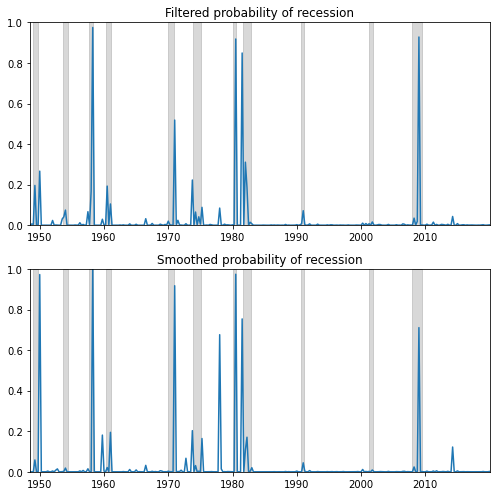

In [45]:
fig, axes = plt.subplots(2, figsize=(7,7))
ax = axes[0]
ax.plot(gdp_residuals.filtered_marginal_probabilities[0])
ax.fill_between(usrec.index, 0, 1, where=usrec['USREC'].values, color='gray', alpha=0.3)
ax.set(xlim=(gdp_df.index[4], gdp_df.index[-1]), ylim=(0, 1),
       title='Filtered probability of recession')

ax = axes[1]
ax.plot(gdp_residuals.smoothed_marginal_probabilities[0])
ax.fill_between(usrec.index, 0, 1, where=usrec['USREC'].values, color='gray', alpha=0.3)
ax.set(xlim=(gdp_df.index[4], gdp_df.index[-1]), ylim=(0, 1),
       title='Smoothed probability of recession')

fig.tight_layout()

In [46]:
print(gdp_residuals.expected_durations)

[ 1.        36.2481605]


The results obtained are intresting and in line with our expectations. The two regimes are caractherized by a negative one ith high volatility and negative returns and positive , more stable one which slowly mantian positve returns.